I will print the outputs of only the first 5 entries for all arrays and lists else you guys have to scroll through a lot to reach the next cell and it also takes a lot of time to commit. If you want to print all the entries, you can fork this kernel and just run a loop until the length of the array or list and print all entries.

In [ ]:
#importing the necessary libraries and dependencies
import pandas as pd
import numpy as np
import seaborn as sns;
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# loading the data into the dataframe
df = pd.read_csv('data.csv')
print(df)

          No  year  month  day  hour  PM2.5  PM10   SO2   NO2   CO    O3  \
0          1  2013      3    1     0    4.0   4.0   4.0   7.0  300  77.0   
1          2  2013      3    1     1    8.0   8.0   4.0   7.0  300  77.0   
2          3  2013      3    1     2    7.0   7.0   5.0  10.0  300  73.0   
3          4  2013      3    1     3    6.0   6.0  11.0  11.0  300  72.0   
4          5  2013      3    1     4    3.0   3.0  12.0  12.0  300  72.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...  ...   ...   
31891  35060  2017      2   28    19   12.0  29.0   5.0  35.0  400  95.0   
31892  35061  2017      2   28    20   13.0  37.0   7.0  45.0  500  81.0   
31893  35062  2017      2   28    21   16.0  37.0  10.0  66.0  700  58.0   
31894  35063  2017      2   28    22   21.0  44.0  12.0  87.0  700  35.0   
31895  35064  2017      2   28    23   19.0  31.0  10.0  79.0  600  42.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM  
0      -0.7  1023.0 -18.8   0.0  NNW   4.4

In [ ]:
# viewing info about the columns
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31896 entries, 0 to 31895
Data columns (total 17 columns):
No       31896 non-null int64
year     31896 non-null int64
month    31896 non-null int64
day      31896 non-null int64
hour     31896 non-null int64
PM2.5    31896 non-null float64
PM10     31896 non-null float64
SO2      31896 non-null float64
NO2      31896 non-null float64
CO       31896 non-null int64
O3       31896 non-null float64
TEMP     31876 non-null float64
PRES     31876 non-null float64
DEWP     31876 non-null float64
RAIN     31876 non-null float64
wd       31821 non-null object
WSPM     31882 non-null float64
dtypes: float64(10), int64(6), object(1)
memory usage: 4.1+ MB


In [ ]:
#viewing few rows from the top
df.head()

No  year  month  day  hour  PM2.5  PM10   SO2   NO2   CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM  
0  1023.0 -18.8   0.0  NNW   4.4  
1  1023.2 -18.2   0.0    N   4.7  
2  1023.5 -18.2   0.0  NNW   5.6  
3  1024.5 -19.4   0.0   NW   3.1  
4  1025.2 -19.5   0.0    N   2.0

In [ ]:
#number of rows and columns in the dataset
print(df.shape)

(31896, 17)


In [ ]:
#statistical information about columns
print(df.describe())

                 No          year         month           day          hour  \
count  31896.000000  31896.000000  31896.000000  31896.000000  31896.000000   
mean   17933.567595   2014.718930      6.400176     15.584587     11.623276   
std    10071.057418      1.164307      3.419374      8.793479      6.930351   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     9436.750000   2014.000000      3.000000      8.000000      6.000000   
50%    18132.500000   2015.000000      6.000000     15.000000     12.000000   
75%    26648.250000   2016.000000      9.000000     23.000000     18.000000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  31896.000000  31896.000000  31896.000000  31896.000000  31896.000000   
mean      81.885265    109.126806     17.155964     59.017494   1257.362208   
std       80.444972     93.686186     22.743912    

In [ ]:
#checking how many null values are in each column
df.isnull().sum()

No        0
year      0
month     0
day       0
hour      0
PM2.5     0
PM10      0
SO2       0
NO2       0
CO        0
O3        0
TEMP     20
PRES     20
DEWP     20
RAIN     20
wd       75
WSPM     14
dtype: int64

Just doing `df.dropna()` drops all the NaN values only for the current execution of the cell. If you do the above `df.isnull().sum()` now, you can see that null values still persists. You can solve this by assigning the obtained output of
`df.dopna()` to the variable `df` which stores our data (dataframe)

In [ ]:
# dropping all the rows with NaN values
df = df.dropna()

In [ ]:
#defining training and testing data
x_train = df[:24865]
y_train = x_train['PM2.5']
x_test = df[24865:31898]
y_test = x_test['PM2.5']
print(y_test)

24873    59.0
24874    53.0
24875    64.0
24876    74.0
24877    78.0
         ... 
31891    12.0
31892    13.0
31893    16.0
31894    21.0
31895    19.0
Name: PM2.5, Length: 6950, dtype: float64


There are many pollutants. Let's first try to predict PM2.5 concentration values. Let the years 2016 and 2017 be the testing set. As you can see below, these 2 years account for 21.9% of the data (test set)

In [ ]:
df.loc[24865:31898].count() / df.shape[0] * 100

No       21.870187
year     21.870187
month    21.870187
day      21.870187
hour     21.870187
PM2.5    21.870187
PM10     21.870187
SO2      21.870187
NO2      21.870187
CO       21.870187
O3       21.870187
TEMP     21.870187
PRES     21.870187
DEWP     21.870187
RAIN     21.870187
wd       21.870187
WSPM     21.870187
dtype: float64

In [ ]:
#Normalizing training data
train_norm = x_train['PM2.5']

#converted into array as all the methods available are for arrays and not lists
train_norm_arr = np.asarray(train_norm)
train_norm = np.reshape(train_norm_arr, (-1, 1))

#Scaling all values between 0 and 1 so that large values don't just dominate
scaler = MinMaxScaler(feature_range=(0, 1))
train_norm = scaler.fit_transform(train_norm)
for i in range(5):
    print(train_norm[i])

[0.00140845]
[0.00704225]
[0.0056338]
[0.00422535]
[0.]


Even after normalization and scaing, null values are possible (many people disregard this). Let's check if any null values are present.

In [ ]:
count = 0
for i in range(len(train_norm)):
    if train_norm[i] == 0:
        count = count +1
print('Number of null values in train_norm = ', count)

Number of null values in train_norm =  296


In [ ]:
#removing null values
train_norm = train_norm[train_norm!=0]

In [ ]:
#Normalizing testing data and repeating the same process as done for training data
test_norm = x_test['PM2.5']
test_norm_arr = np.asarray(test_norm)
test_norm = np.reshape(test_norm_arr, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
test_norm = scaler.fit_transform(test_norm)
for i in range(5):
    print(test_norm[i])

[0.07887324]
[0.07042254]
[0.08591549]
[0.1]
[0.1056338]


In [ ]:
count = 0
for i in range(len(test_norm)):
    if test_norm[i] == 0:
        count = count + 1
print('Number of null values in test_norm = ', count)

Number of null values in test_norm =  129


In [ ]:
#removing null values
test_norm = test_norm[test_norm != 0]

In [ ]:
print(train_norm.shape)
print(test_norm.shape)

(24569,)
(6821,)


Since this is a time series data, we should be predicting the values after looking at a set of values rather than just a single value like we usually do. This takes into account the correlation between the data points and the timestamps. Because the neighbours should be considered for how the values change over time. Let's define a function to do this.

The below function called split_sequence splits the sequence into sets of n values. This n is given as n_steps (step_size). For example, if n=3, we split the sequence in groups of 3. We create 2 empty lists and append the split sequences.

In [ ]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X),array(y)

Here the number of features = 1 as we will be predicting a single value. Let's reshape the split sequences into the format of number of rows, number of columns. (shape[0], shape[1]). In the output, we can see that groups of 3 since n_steps = 3 have been obtained.

In [ ]:
n_steps = 3
X_split_train, y_split_train = split_sequence(train_norm, n_steps)
#for i in range(len(X_split_train)):
    #print(X_split_train[i], y_split_train[i])
n_features = 1
X_split_train = X_split_train.reshape((X_split_train.shape[0], X_split_train.shape[1], n_features))
for i in range(5):
    print(X_split_train)

[[[0.00140845]
  [0.00704225]
  [0.0056338 ]]

 [[0.00704225]
  [0.0056338 ]
  [0.00422535]]

 [[0.0056338 ]
  [0.00422535]
  [0.0028169 ]]

 ...

 [[0.10704225]
  [0.1028169 ]
  [0.08732394]]

 [[0.1028169 ]
  [0.08732394]
  [0.08732394]]

 [[0.08732394]
  [0.08732394]
  [0.08873239]]]
[[[0.00140845]
  [0.00704225]
  [0.0056338 ]]

 [[0.00704225]
  [0.0056338 ]
  [0.00422535]]

 [[0.0056338 ]
  [0.00422535]
  [0.0028169 ]]

 ...

 [[0.10704225]
  [0.1028169 ]
  [0.08732394]]

 [[0.1028169 ]
  [0.08732394]
  [0.08732394]]

 [[0.08732394]
  [0.08732394]
  [0.08873239]]]
[[[0.00140845]
  [0.00704225]
  [0.0056338 ]]

 [[0.00704225]
  [0.0056338 ]
  [0.00422535]]

 [[0.0056338 ]
  [0.00422535]
  [0.0028169 ]]

 ...

 [[0.10704225]
  [0.1028169 ]
  [0.08732394]]

 [[0.1028169 ]
  [0.08732394]
  [0.08732394]]

 [[0.08732394]
  [0.08732394]
  [0.08873239]]]
[[[0.00140845]
  [0.00704225]
  [0.0056338 ]]

 [[0.00704225]
  [0.0056338 ]
  [0.00422535]]

 [[0.0056338 ]
  [0.00422535]
  [0.0028169

You can see below that, we predict the value for the first 3 values, then consider that output as one of the 3 values in the next set. For example, we preedict 0.1 first, then we take that 0.1 as input in the second set and so on.

In [ ]:
X_split_test, y_split_test = split_sequence(test_norm, n_steps)
for i in range(5):
    print(X_split_test[i], y_split_test[i])
n_features = 1
X_split_test = X_split_test.reshape((X_split_test.shape[0], X_split_test.shape[1], n_features))

[0.07887324 0.07042254 0.08591549] 0.1
[0.07042254 0.08591549 0.1       ] 0.10563380281690142
[0.08591549 0.1        0.1056338 ] 0.09295774647887325
[0.1        0.1056338  0.09295775] 0.10845070422535212
[0.1056338  0.09295775 0.1084507 ] 0.11690140845070424


Let's define our neural network (LSTM: Long Short Term Memory). Let's add 50 nodes in our first layer with a ReLU (Rectified linear unit) activation. Their shape will be step size, number of features. Then we will add, a dense layer with one node for the output.

We can try out different optimizers to see which minimizes loss and maximizes accuracy. Stochastic gradient descent (SGD), Adam, AdaBoost, RMSProp are few of them. lr = learning rate, decay = by how much to decay the learning rate, momentum = how much should the gradient descent be accelerated to dampen oscillations, nesterov = whether to use nesterov momentum. Nesterov has stronger convergence for convex functions. And then we compile using MSE (mean squared loss) as our loss function.

In [ ]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))

#sgd = optimizers.SGD(lr=0.001, decay=1e-5, momentum=1.0, nesterov=False)
sgd = optimizers.SGD(lr=0.01, decay=1e-5, momentum=0.9, nesterov=True) #good

#keras.optimizers.RMSprop(learning_rate=0.01, rho=0.9)
keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [ ]:
# fit model
hist = model.fit(X_split_train, y_split_train, validation_data=(X_split_test, y_split_test), epochs=10, verbose = 1)

Train on 24566 samples, validate on 6818 samples
Epoch 1/10
24566/24566 [==============================] - 8s 326us/step - loss: 0.0020 - accuracy: 0.0000e+00 - val_loss: 0.0011 - val_accuracy: 1.4667e-04
Epoch 2/10
24566/24566 [==============================] - 9s 356us/step - loss: 0.0011 - accuracy: 0.0000e+00 - val_loss: 8.6184e-04 - val_accuracy: 1.4667e-04
Epoch 3/10
24566/24566 [==============================] - 7s 276us/step - loss: 9.5812e-04 - accuracy: 4.0707e-05 - val_loss: 7.7410e-04 - val_accuracy: 1.4667e-04
Epoch 4/10
24566/24566 [==============================] - 9s 376us/step - loss: 9.1253e-04 - accuracy: 4.0707e-05 - val_loss: 7.2924e-04 - val_accuracy: 1.4667e-04
Epoch 5/10
24566/24566 [==============================] - 9s 376us/step - loss: 8.9729e-04 - accuracy: 4.0707e-05 - val_loss: 7.1138e-04 - val_accuracy: 1.4667e-04
Epoch 6/10
24566/24566 [==============================] - 9s 347us/step - loss: 8.9233e-04 - accuracy: 4.0707e-05 - val_loss: 6.8999e-04 - val_

In [ ]:
print(hist.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


In [ ]:
yhat = model.predict(X_split_test)
for i in range(5):
    print(yhat[i])

[0.09107611]
[0.10551977]
[0.10909769]
[0.091542]
[0.1137628]


In [ ]:
mse = mean_squared_error(y_split_test, yhat)
print('MSE: %.5f' % mse)

MSE: 0.00067


Below, I have plotted the actual true values (first plot) and preedicted values (second plot). One can visually see that the distribution is almost the same. This says that our predictions are very accurate.

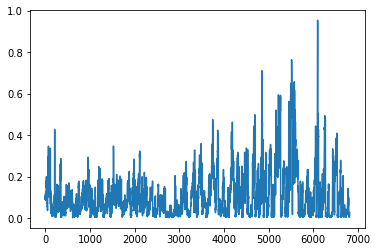

In [ ]:
plt.plot(yhat)

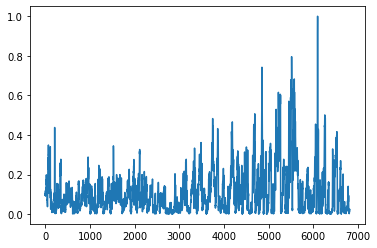

In [ ]:
plt.plot(y_split_test)

In [ ]:
_, train_acc = model.evaluate(X_split_train, y_split_train, verbose=0)
_, test_acc = model.evaluate(X_split_test, y_split_test, verbose=0)
print('Train: %.5f, Test: %.5f' % (train_acc, test_acc))

Train: 0.00004, Test: 0.00015


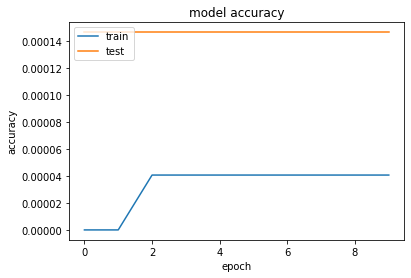

In [ ]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Above, accuracy increase a lot in the last few epochs. Below, the loss gradually decrease. These are positive signs that our model is doing very good.

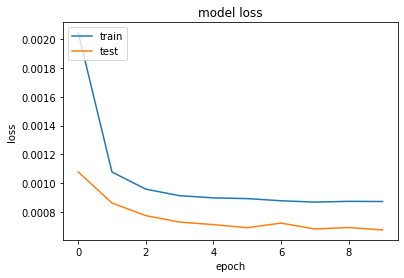

In [ ]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Until now, we just ran our model for prediction of a single pollutant. We have 6 pollutants in our dataset and can make predictions for all of them. So, I have made a function which can be used to predict the other pollutants rather than having to write the code again and again. I have commented the function calls. You can fork this kernel to uncomment and predit the other pollutants (Coz it would take up a lot of space and time).

In [ ]:
def compute(var):
    train_norm = x_train[var]
    train_norm_arr = np.asarray(train_norm)
    train_norm = np.reshape(train_norm_arr, (-1, 1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_norm = scaler.fit_transform(train_norm)
    train_norm = train_norm[train_norm != 0]

    test_norm = x_test[var]
    test_norm_arr = np.asarray(test_norm)
    test_norm = np.reshape(test_norm_arr, (-1, 1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    test_norm = scaler.fit_transform(test_norm)
    test_norm = test_norm[test_norm != 0]

    X_split_train, y_split_train = split_sequence(train_norm, n_steps)
    X_split_train = X_split_train.reshape((X_split_train.shape[0], X_split_train.shape[1], n_features))

    X_split_test, y_split_test = split_sequence(test_norm, n_steps)
    X_split_test = X_split_test.reshape((X_split_test.shape[0], X_split_test.shape[1], n_features))

    hist = model.fit(X_split_train, y_split_train, validation_data=(X_split_test, y_split_test), epochs=10, verbose = 1)

    yhat = model.predict(X_split_test)

    mse = mean_squared_error(y_split_test, yhat)
    print(mse)

    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Train on 24859 samples, validate on 6945 samples
Epoch 1/10
24859/24859 [==============================] - 8s 322us/step - loss: 0.0014 - accuracy: 0.0000e+00 - val_loss: 0.0011 - val_accuracy: 1.4399e-04
Epoch 2/10
24859/24859 [==============================] - 8s 327us/step - loss: 0.0014 - accuracy: 0.0000e+00 - val_loss: 0.0011 - val_accuracy: 1.4399e-04
Epoch 3/10
24859/24859 [==============================] - 8s 335us/step - loss: 0.0014 - accuracy: 4.0227e-05 - val_loss: 0.0011 - val_accuracy: 1.4399e-04
Epoch 4/10
24859/24859 [==============================] - 7s 297us/step - loss: 0.0014 - accuracy: 0.0000e+00 - val_loss: 0.0010 - val_accuracy: 1.4399e-04
Epoch 5/10
24859/24859 [==============================] - 2s 79us/step - loss: 0.0014 - accuracy: 0.0000e+00 - val_loss: 0.0011 - val_accuracy: 1.4399e-04
Epoch 6/10
24859/24859 [==============================] - 2s 84us/step - loss: 0.0014 - accuracy: 0.0000e+00 - val_loss: 0.0010 - val_accuracy: 1.4399e-04
Epoch 7/10
24859/

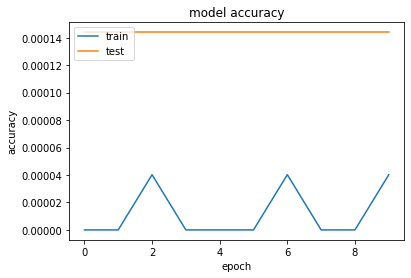

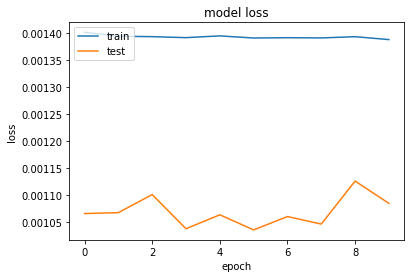

In [ ]:
compute('PM10')

Train on 24860 samples, validate on 4424 samples
Epoch 1/10
24860/24860 [==============================] - 2s 77us/step - loss: 8.6604e-04 - accuracy: 4.0225e-05 - val_loss: 8.6076e-04 - val_accuracy: 2.2604e-04
Epoch 2/10
24860/24860 [==============================] - 2s 83us/step - loss: 8.5588e-04 - accuracy: 4.0225e-05 - val_loss: 8.1820e-04 - val_accuracy: 2.2604e-04
Epoch 3/10
24860/24860 [==============================] - 2s 76us/step - loss: 8.5137e-04 - accuracy: 4.0225e-05 - val_loss: 8.1157e-04 - val_accuracy: 2.2604e-04
Epoch 4/10
24860/24860 [==============================] - 2s 76us/step - loss: 8.5228e-04 - accuracy: 4.0225e-05 - val_loss: 8.1922e-04 - val_accuracy: 2.2604e-04
Epoch 5/10
24860/24860 [==============================] - 2s 76us/step - loss: 8.5261e-04 - accuracy: 4.0225e-05 - val_loss: 8.0663e-04 - val_accuracy: 2.2604e-04
Epoch 6/10
24860/24860 [==============================] - 2s 76us/step - loss: 8.4676e-04 - accuracy: 4.0225e-05 - val_loss: 8.1864e-04 

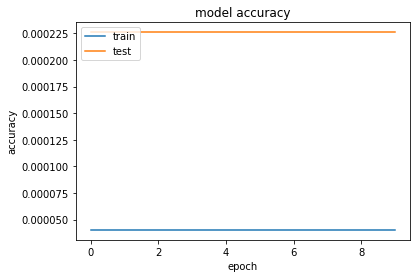

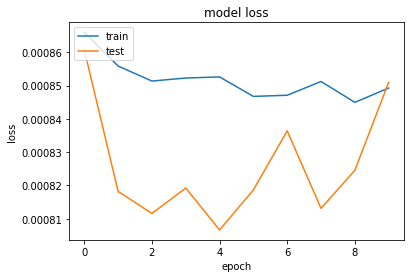

In [ ]:
compute('SO2')

Train on 24804 samples, validate on 6930 samples
Epoch 1/10
24804/24804 [==============================] - 2s 80us/step - loss: 0.0019 - accuracy: 4.0316e-05 - val_loss: 0.0027 - val_accuracy: 1.4430e-04
Epoch 2/10
24804/24804 [==============================] - 2s 80us/step - loss: 0.0019 - accuracy: 4.0316e-05 - val_loss: 0.0026 - val_accuracy: 1.4430e-04
Epoch 3/10
24804/24804 [==============================] - 2s 80us/step - loss: 0.0019 - accuracy: 4.0316e-05 - val_loss: 0.0026 - val_accuracy: 1.4430e-04
Epoch 4/10
24804/24804 [==============================] - 2s 82us/step - loss: 0.0019 - accuracy: 4.0316e-05 - val_loss: 0.0026 - val_accuracy: 1.4430e-04
Epoch 5/10
24804/24804 [==============================] - 2s 84us/step - loss: 0.0018 - accuracy: 4.0316e-05 - val_loss: 0.0026 - val_accuracy: 1.4430e-04
Epoch 6/10
24804/24804 [==============================] - 2s 89us/step - loss: 0.0019 - accuracy: 4.0316e-05 - val_loss: 0.0025 - val_accuracy: 1.4430e-04
Epoch 7/10
24804/2480

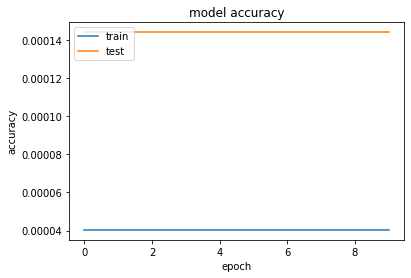

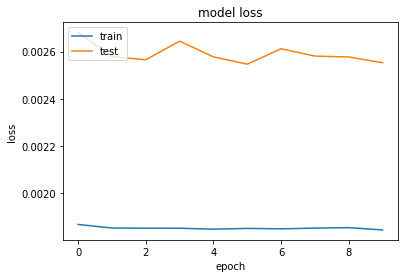

In [ ]:
compute('NO2')

Train on 24753 samples, validate on 6852 samples
Epoch 1/10
24753/24753 [==============================] - 2s 78us/step - loss: 0.0013 - accuracy: 1.2120e-04 - val_loss: 0.0019 - val_accuracy: 2.9189e-04
Epoch 2/10
24753/24753 [==============================] - 2s 80us/step - loss: 0.0013 - accuracy: 1.2120e-04 - val_loss: 0.0018 - val_accuracy: 2.9189e-04
Epoch 3/10
24753/24753 [==============================] - 2s 77us/step - loss: 0.0013 - accuracy: 1.2120e-04 - val_loss: 0.0018 - val_accuracy: 2.9189e-04
Epoch 4/10
24753/24753 [==============================] - 2s 79us/step - loss: 0.0013 - accuracy: 1.2120e-04 - val_loss: 0.0018 - val_accuracy: 2.9189e-04
Epoch 5/10
24753/24753 [==============================] - 2s 75us/step - loss: 0.0013 - accuracy: 1.2120e-04 - val_loss: 0.0020 - val_accuracy: 2.9189e-04
Epoch 6/10
24753/24753 [==============================] - 2s 75us/step - loss: 0.0013 - accuracy: 1.2120e-04 - val_loss: 0.0018 - val_accuracy: 2.9189e-04
Epoch 7/10
24753/2475

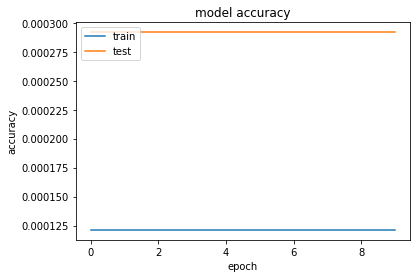

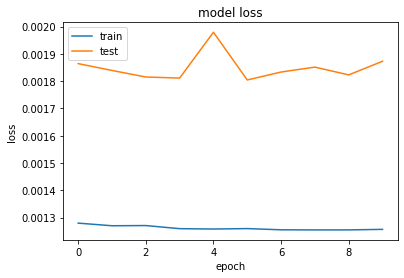

In [ ]:
compute('CO')

Train on 24856 samples, validate on 5821 samples
Epoch 1/10
24856/24856 [==============================] - 2s 75us/step - loss: 0.0012 - accuracy: 4.0232e-05 - val_loss: 0.0024 - val_accuracy: 1.7179e-04
Epoch 2/10
24856/24856 [==============================] - 2s 75us/step - loss: 0.0012 - accuracy: 4.0232e-05 - val_loss: 0.0024 - val_accuracy: 1.7179e-04
Epoch 3/10
24856/24856 [==============================] - 2s 74us/step - loss: 0.0012 - accuracy: 4.0232e-05 - val_loss: 0.0024 - val_accuracy: 1.7179e-04
Epoch 4/10
24856/24856 [==============================] - 2s 74us/step - loss: 0.0012 - accuracy: 4.0232e-05 - val_loss: 0.0025 - val_accuracy: 1.7179e-04
Epoch 5/10
24856/24856 [==============================] - 2s 75us/step - loss: 0.0012 - accuracy: 4.0232e-05 - val_loss: 0.0026 - val_accuracy: 1.7179e-04
Epoch 6/10
24856/24856 [==============================] - 2s 76us/step - loss: 0.0012 - accuracy: 4.0232e-05 - val_loss: 0.0024 - val_accuracy: 1.7179e-04
Epoch 7/10
24856/2485

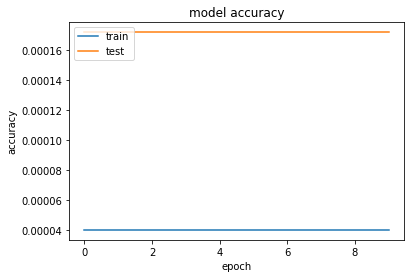

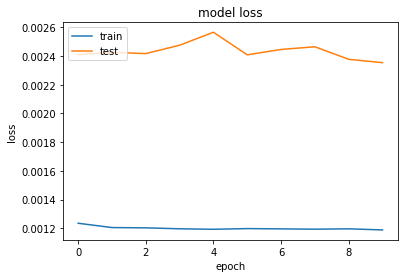

In [ ]:
compute('O3')

Below, we will do a lot of visualizations to understand our data using various scatterplots, jointplots, pairplots, heatmap and correlation.

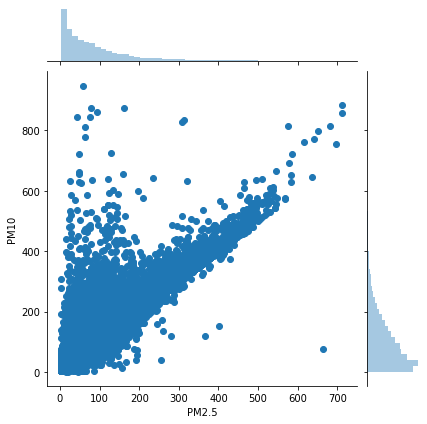

In [ ]:
sns.jointplot(x=df['PM2.5'], y=df['PM10'], data = df)

The above plot gives us the idea that these two conentrations are positively correlated with very few outliers.

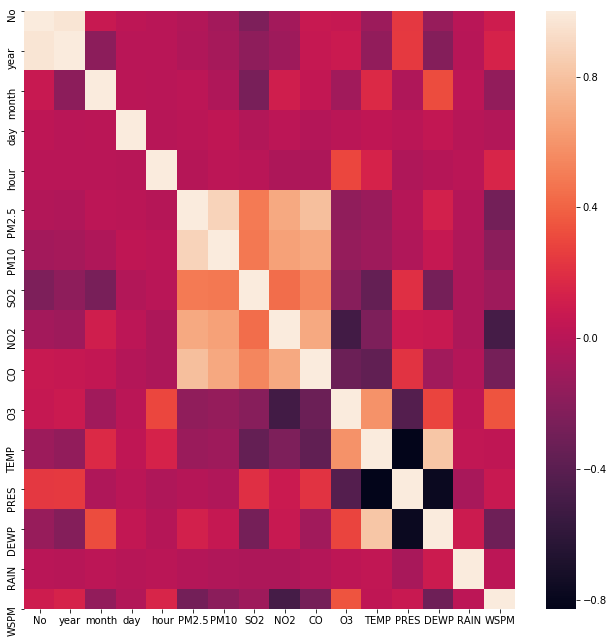

In [ ]:
#finding correlation
corrmat = df.corr()
fig, ax = plt.subplots(figsize=(11,11))
sns.heatmap(corrmat)

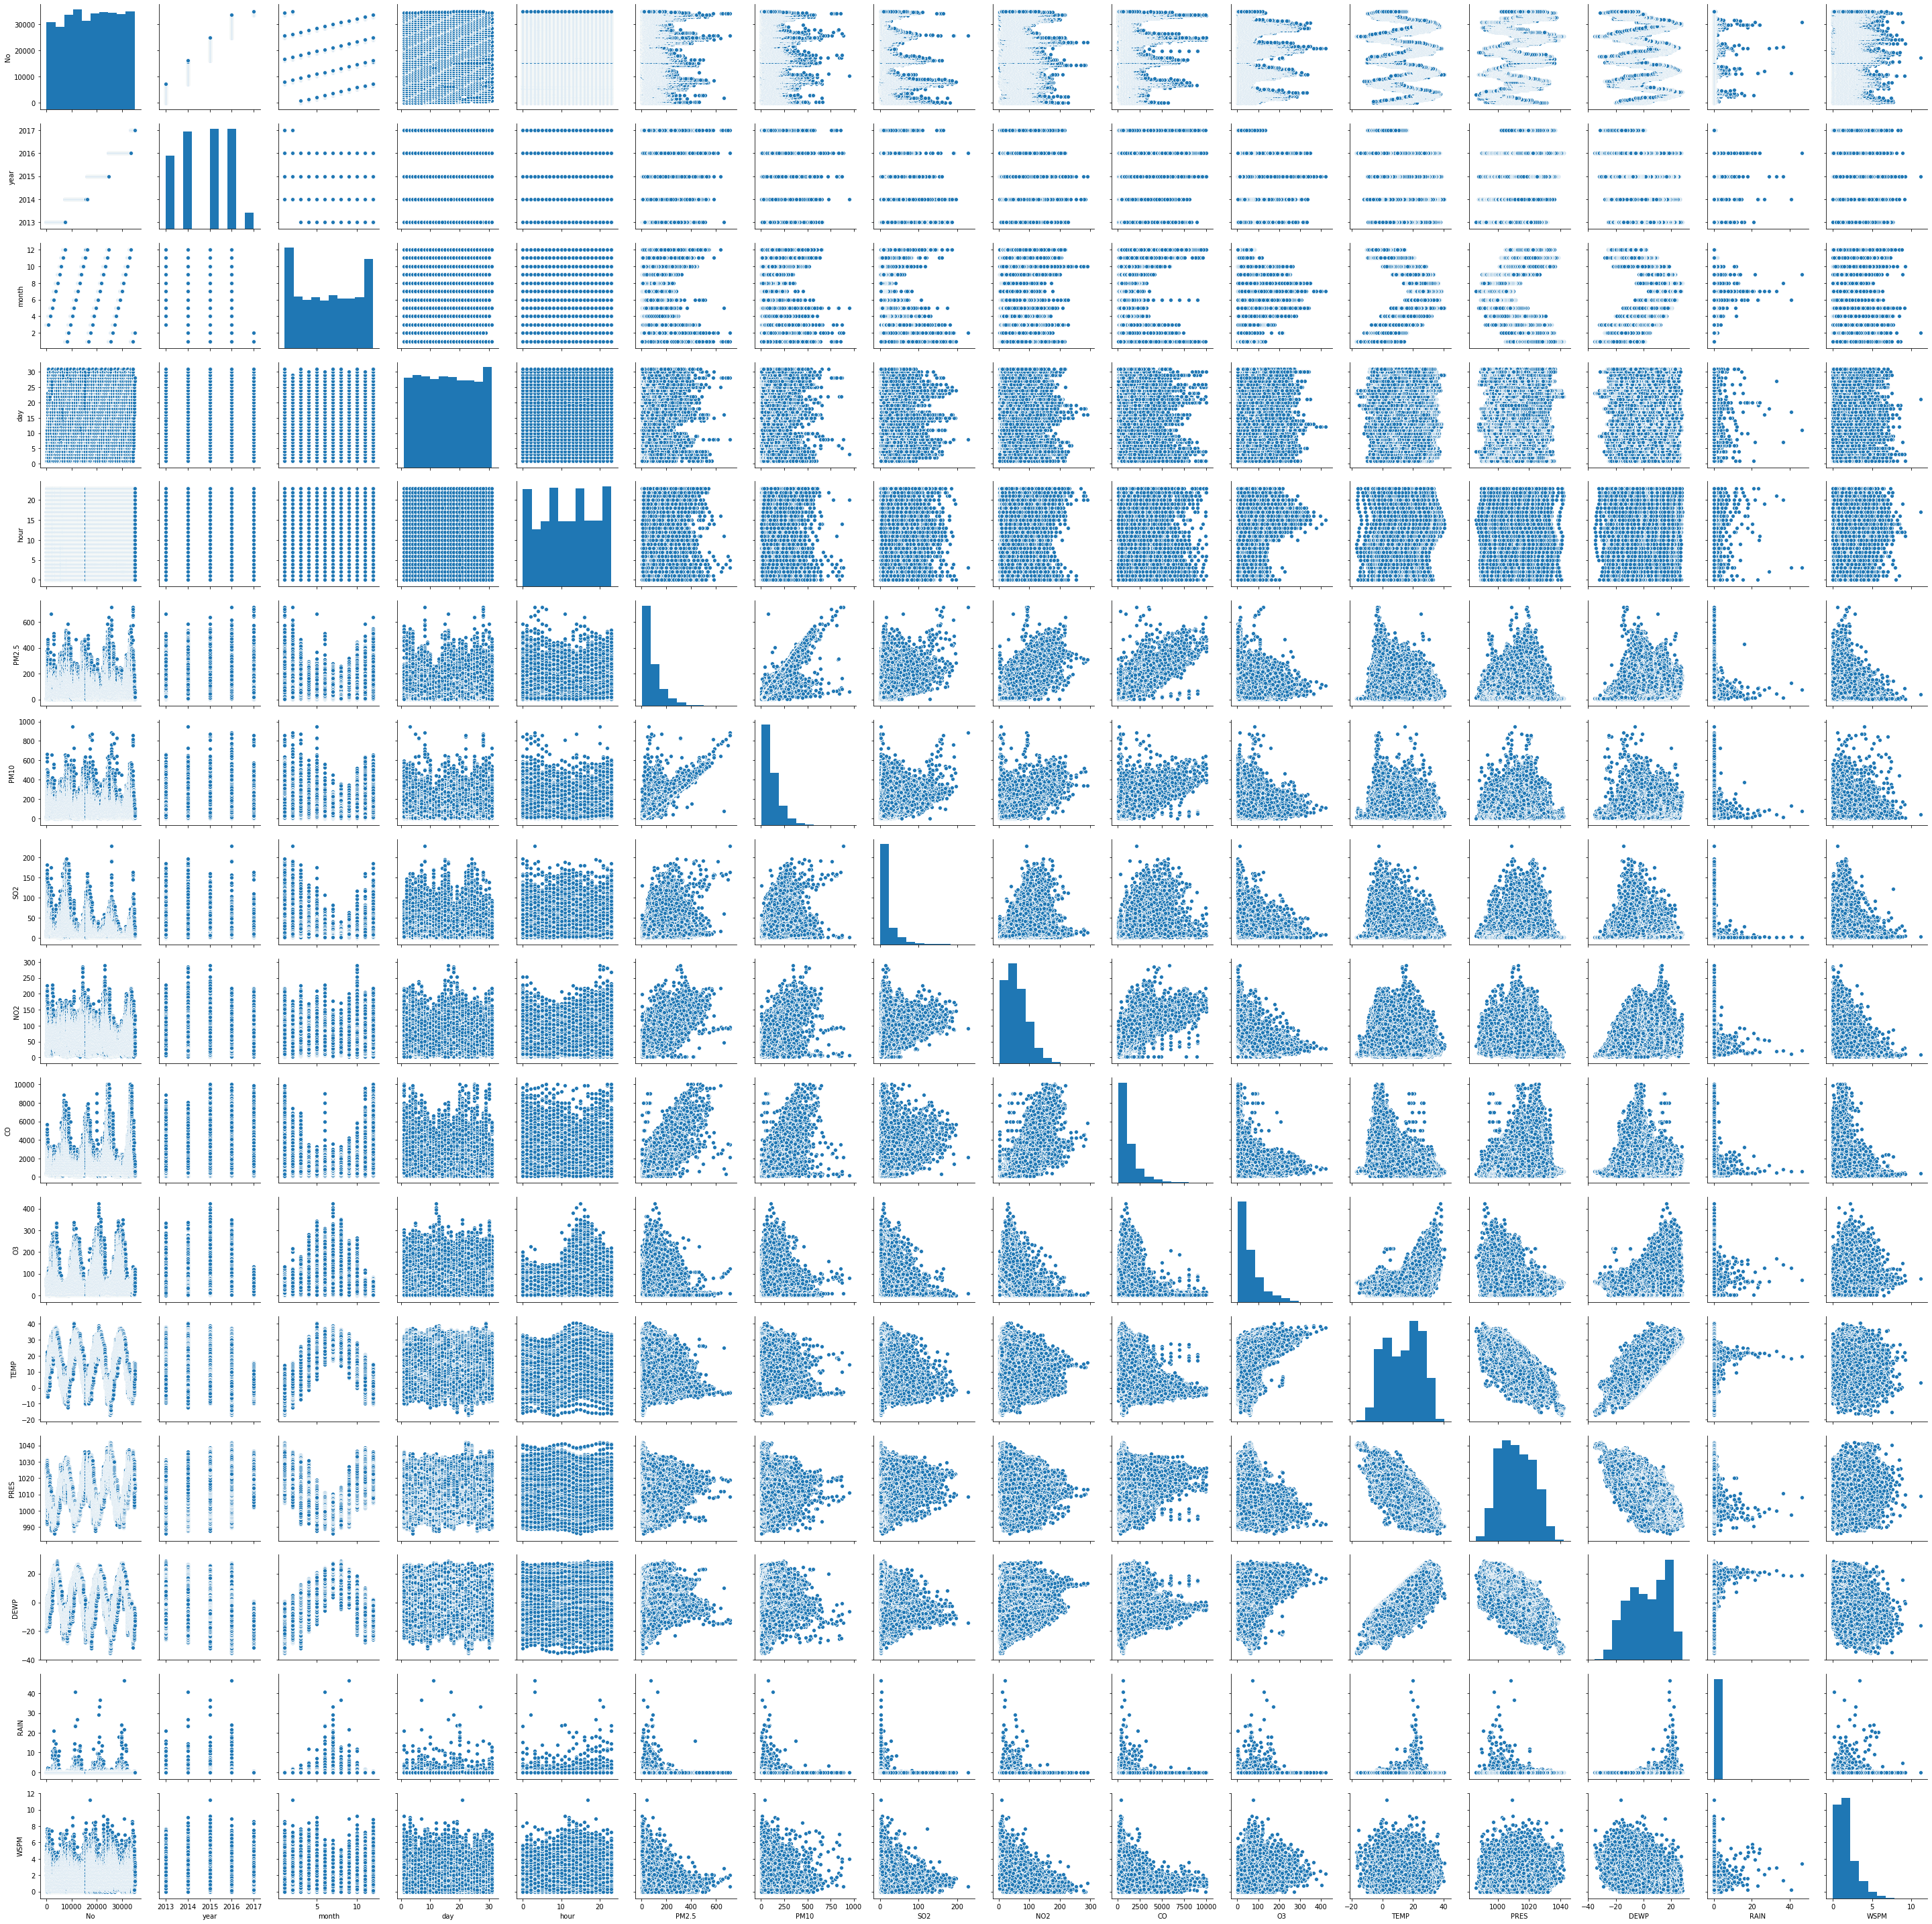

In [ ]:
g = sns.pairplot(df)

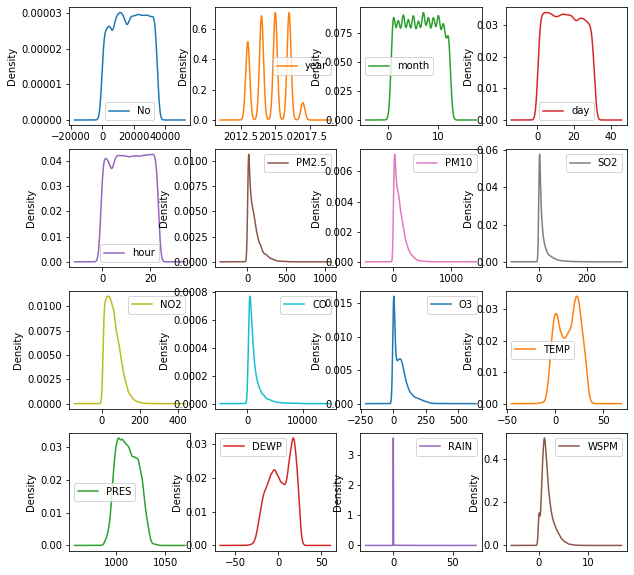

In [ ]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(10,10))
plt.show()

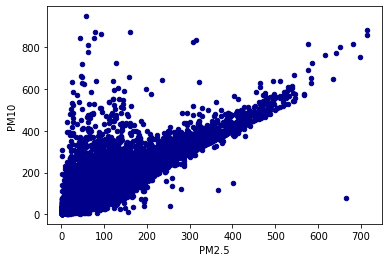

In [ ]:
df.plot.scatter(x='PM2.5', y='PM10', c='DarkBlue')

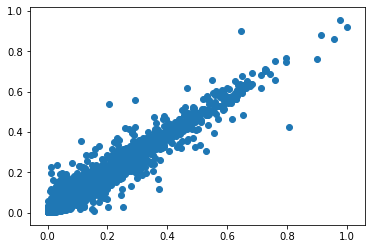

In [ ]:
plt.scatter(y_split_test, yhat)

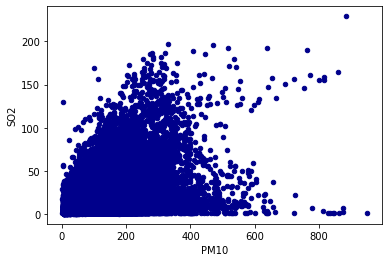

In [ ]:
df.plot.scatter(x='PM10', y='SO2', c='DarkBlue')

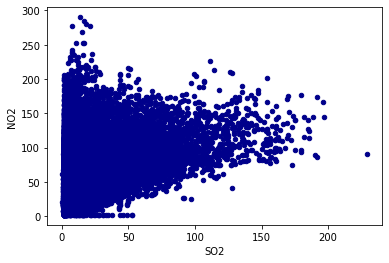

In [ ]:
df.plot.scatter(x='SO2', y='NO2', c='DarkBlue')

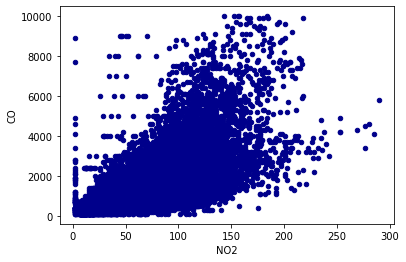

In [ ]:
df.plot.scatter(x='NO2', y='CO', c='DarkBlue')

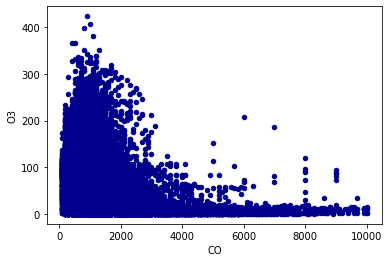

In [ ]:
df.plot.scatter(x='CO', y='O3', c='DarkBlue')

Heatmap is a very useful visualization tool to know how much each feature is correlated. vmax = max value of the heatmap fmt = number of decimal places upto which the value is shown square = do you want the heatmap to be square shaped linewidth = width of the lines in the heatmap annot = should the boxes be labelled with the value.

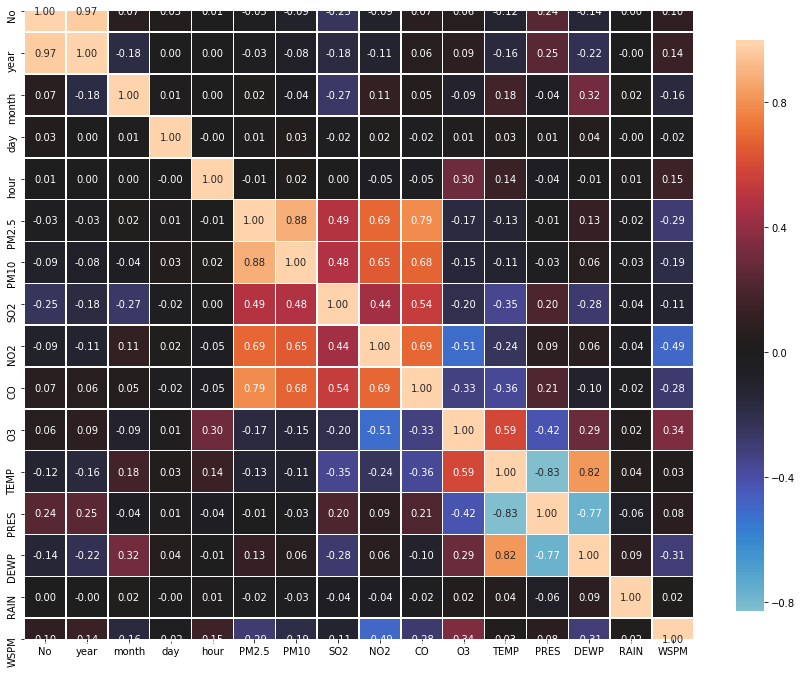

In [ ]:
correlations = df.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show();